# Play with agglomeration effects

Startup run in 6.162558078765869 secs.


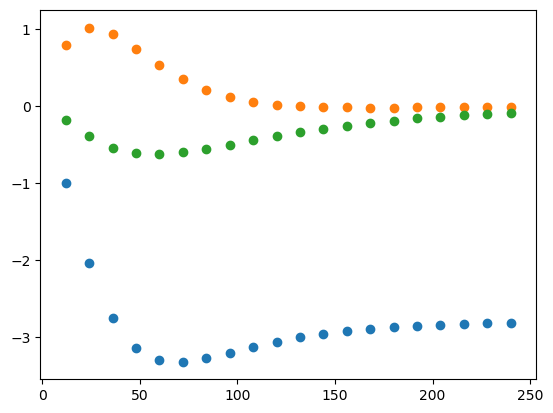

false

In [1]:
using NBInclude
_VERS_ = :base
@nbinclude("startup.ipynb")

dir_gra = joinpath(pwd(),"../graphs/agglomeration")
_tosave = false

# 1) Version when removing externalities

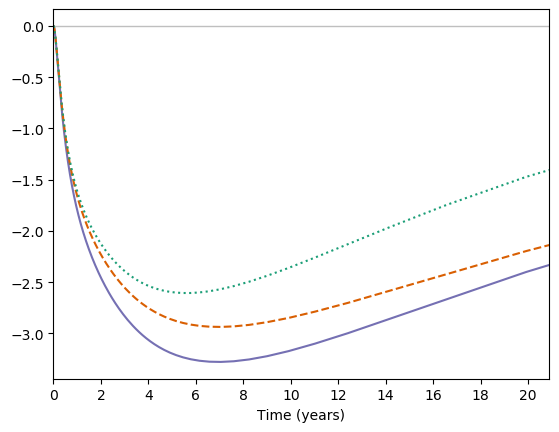

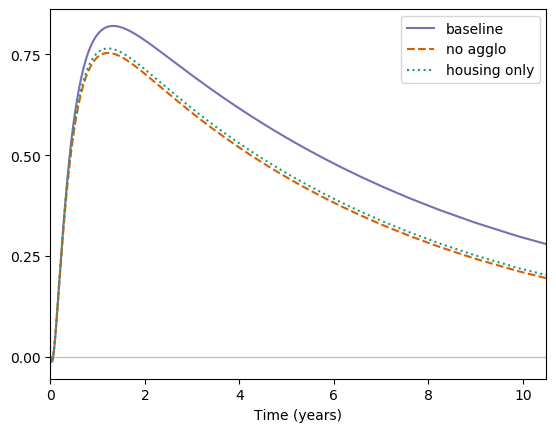

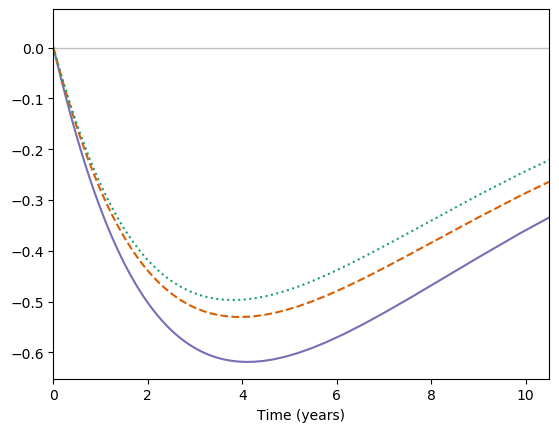

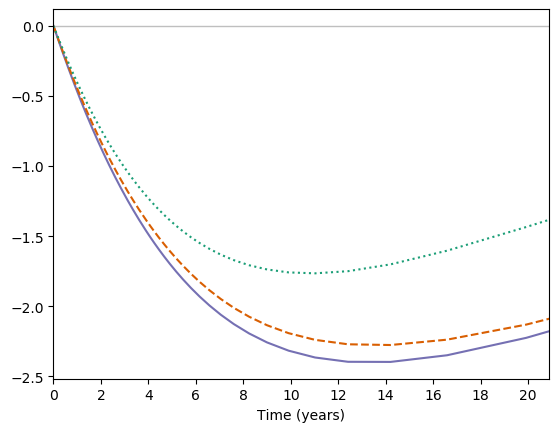

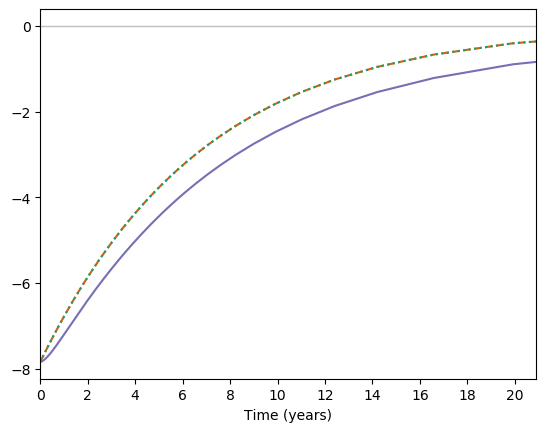

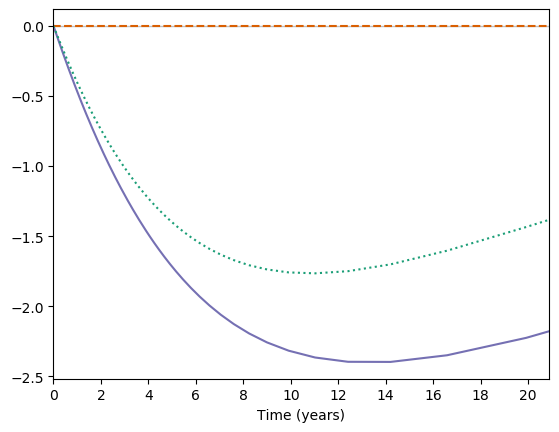

()

In [2]:
p_noagglo = StrucPar_agglo(0,0,0,0,0,0,p)
p_housing = StrucPar_agglo(p.eHd,0,0,0,0,0,p)
#p_prodagglo = StrucPar_agglo(0,0,0,0,0,p.eYn,p) ## not stable

tab =[]
for myp in [p, p_noagglo, p_housing]
    mysimu = simulate(240, simpar, myp)
    push!(tab, (myp,mysimu))
end

mylabel = ["baseline", "no agglo", "housing only"]

### employment
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.m ./myp.m_star .- 1) .* 100 , 
             c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"employment.png")) : ()



### unemployment rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.urate .- ((myp.l_star-myp.m_star)/(myp.l_star)) ) .* 100 , 
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,10.5))
legend()
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.25) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"urate.png")) : ()



### participation rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.prate .- (myp.l_star/myp.d_star) ) .* 100 , 
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,10.5))
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.1) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"prate.png")) : ()


### population
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.d./myp.d_star .-1) .* 100  , 
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"population.png")) : ()



## productivity
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    yy = [Atilde_fun(mysimu.t[i],myp) * Agglo.Y_fun(mysimu.d[i], mysimu.n[i], myp) for i in 1:length(mysimu.l)]
    plot(mysimu.t ./ 12, (yy ./ myp.Y_star .- 1) .* 100 , 
             c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"productivity.png")) : ()




## housing
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    yy = [Agglo.H_fun(mysimu.d[i], mysimu.n[i], myp) for i in 1:length(mysimu.l)]
    plot(mysimu.t ./ 12, (yy ./ myp.H_star .- 1) .* 100 , 
             c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"housing.png")) : ()


# 2) Playing with agglomeration economies

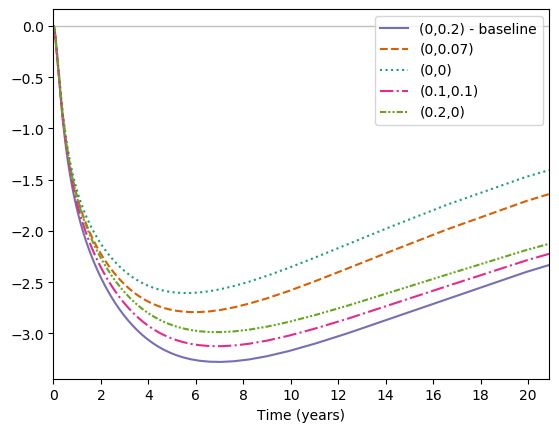

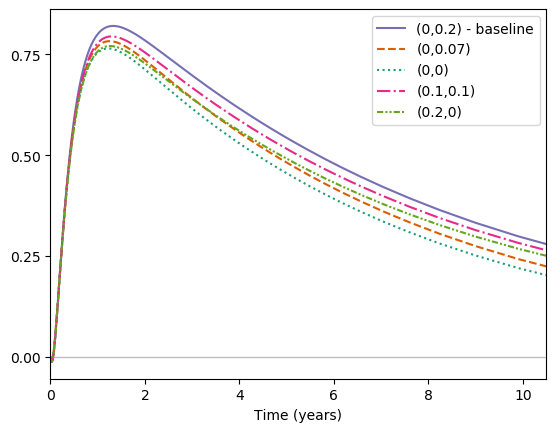

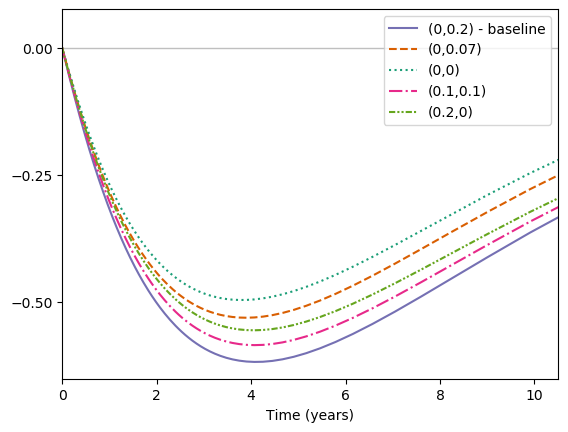

()

In [3]:
## play with agglomeration economies
p1 = StrucPar_agglo(p.eHd,0,0,0,0,0.07,p)
p2 = StrucPar_agglo(p.eHd,0,0,0,0,0,p)
p3 = StrucPar_agglo(p.eHd,0,0,0,0.1,0.1,p)
p4 = StrucPar_agglo(p.eHd,0,0,0,0.2,0,p)

tab =[]
for myp in [p, p1, p2, p3, p4]
    mysimu = simulate(240, simpar, myp)
    push!(tab, (myp,mysimu))
end

mylabel = ["(0,0.2) - baseline", "(0,0.07)", "(0,0)", "(0.1,0.1)", "(0.2,0)"]

### employment
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.m ./myp.m_star .- 1) .* 100 , 
             c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
legend()
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"employment2.png")) : ()



### unemployment rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.urate .- ((myp.l_star-myp.m_star)/(myp.l_star)) ) .* 100 , 
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,10.5))
legend()
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.25) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"urate2.png")) : ()


### participation rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.prate .- (myp.l_star/myp.d_star) ) .* 100 , 
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,10.5))
legend()
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.25) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"prate2.png")) : ()

# 3) Playing with housing

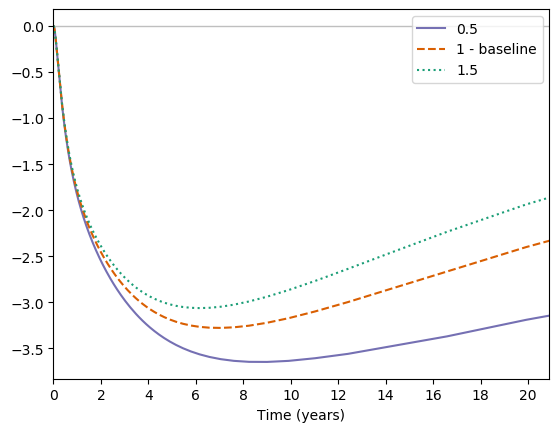

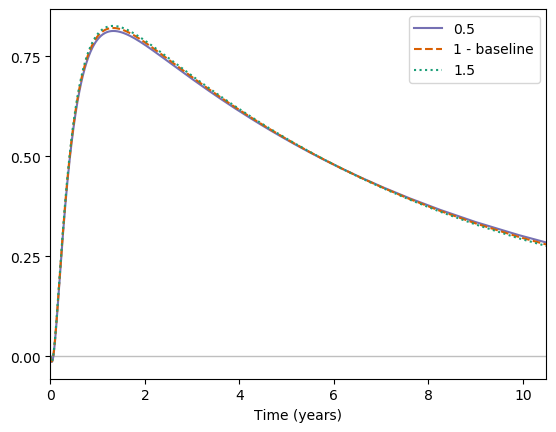

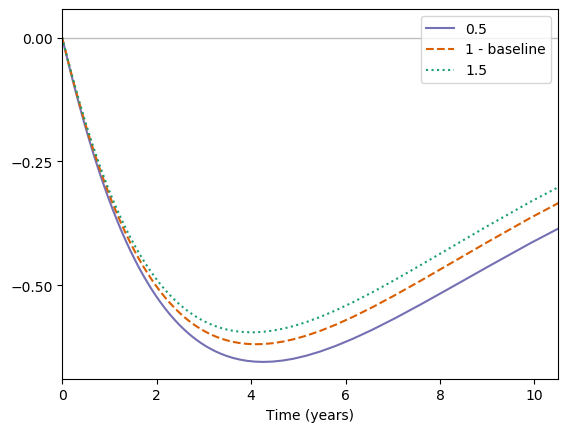

()

In [4]:
## play with housing
p1 = StrucPar_agglo(0.5, 0, p.eKd, p.eKn, p.eYd, p.eYn,p)
p2 = StrucPar_agglo(1.5,0,p.eKd, p.eKn, p.eYd, p.eYn,p)
tab =[]
for myp in [p1, p, p2]
    mysimu = simulate(240, simpar, myp)
    push!(tab, (myp,mysimu))
end

mylabel = ["0.5", "1 - baseline", "1.5"]

### employment
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.m ./myp.m_star .- 1) .* 100 , 
             c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
legend(loc=1)
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"employment3.png")) : ()



### unemployment rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.urate .- ((myp.l_star-myp.m_star)/(myp.l_star)) ) .* 100 , 
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,10.5))
legend()
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.25) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"urate3.png")) : ()


### participation rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.prate .- (myp.l_star/myp.d_star) ) .* 100 , 
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,10.5))
legend(loc=1)
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.25) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"prate3.png")) : ()